# Task 2 Titanic Classification

The project based on the dataset contains data from Titanic passengers survived. Our task is in the project is to make a predictive model for passengers whether they will survived or not.


**1. First of all we have to importing libaries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**2. Loading the 'titanic.csv' dataset**

In [2]:
data = pd.read_csv("titanic.csv")
print("Shape of the dataset: ", data.shape)
data.head()

Shape of the dataset:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('Data infromation: ')
print('~'*50)
data.info()

print('-'*50)
print(data.isnull().sum())


Data infromation: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp    

**3. Handeling with Missing Values:**

As we can see the above output,

In data, Sex has 177 missing values, Cabin has 687 missing values and Embarked has 2 missing values.
 
**3.1 Age**

Fill all missing value in Age by mean of the whole Age column.

In [4]:
data['Age'].fillna(data['Age'].mean(),inplace= True)

**3.2 Cabin**

Since, Cabin have lots of missing data, so removing it from our dataset.

In [5]:
data = data.drop('Cabin',axis = 1)

**3.2 Embarked**

Since, It has only two missing values, we can fill it my it's mode

In [6]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

*Now, checking that all missing values are removed or not*

In [7]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**4. Finding Statistical Measures**

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*!!!Check Point!!!*

In [9]:
df = data.copy()

*Finding the number of people survivd and not survived*

*Now, our data is ready for further process*

**5. Data Visualization**

In [10]:
data['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

*5.1 Making Count plot for Survived.*

Where, 0 = Not Survived and 1 = Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

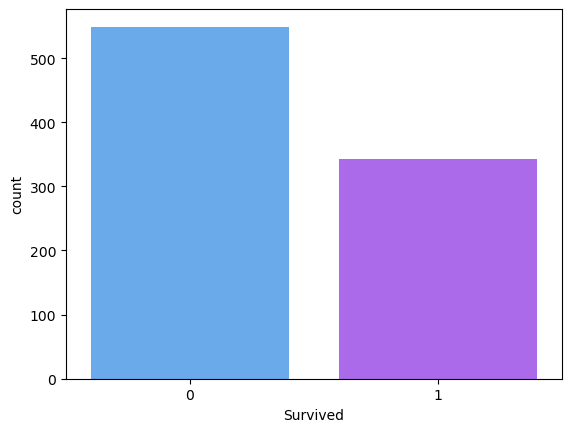

In [11]:
sns.countplot(x= 'Survived', data =df, palette = "cool")

In [12]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

*5.2 Making countplot for Sex.*

<AxesSubplot:xlabel='Sex', ylabel='count'>

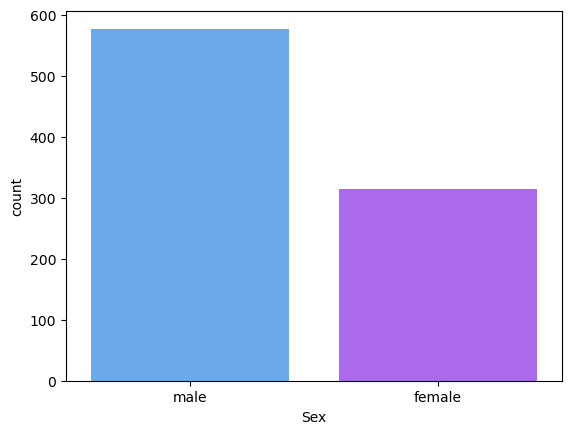

In [13]:
sns.countplot(x= 'Sex', data =df,palette = 'cool')

In [14]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

*5.3 Making count plot for Pclass.*

<AxesSubplot:xlabel='Pclass', ylabel='count'>

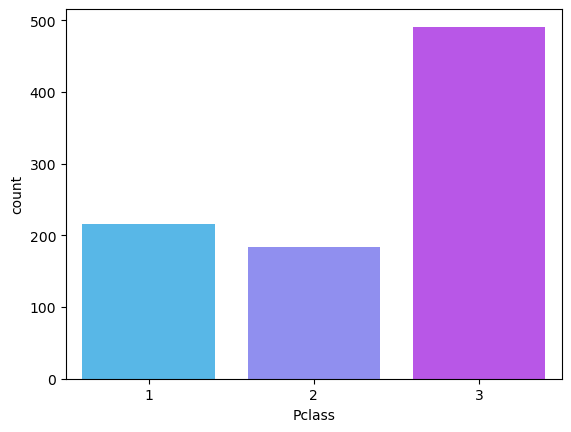

In [15]:
sns.countplot(x= 'Pclass',data= df,palette = 'cool')

*5.4 Making count for Pclass with survived.*

<AxesSubplot:xlabel='Pclass', ylabel='count'>

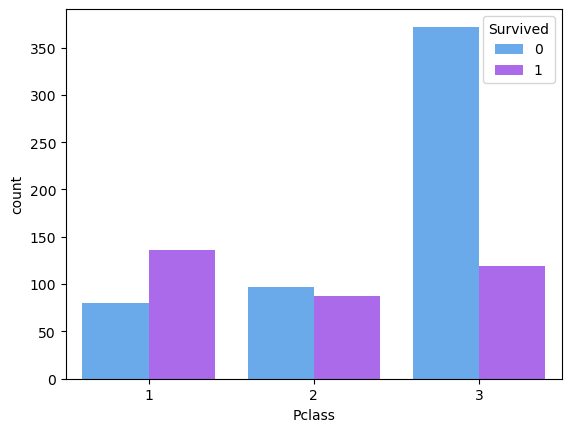

In [16]:
sns.countplot(x= 'Pclass',hue = 'Survived',data= df,palette = 'cool')

In [17]:
df.drop('Name',axis= 1, inplace = True)

In [18]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

*5.5 Replacing in Sex: Male by 1 and Female by 0 and in Embarked S by 0, C by 1 and Q by 2*

In [20]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace =True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0


In [21]:
df.drop('Ticket',axis =1, inplace=True)

In [22]:
df.drop('PassengerId',axis= 1,inplace = True)

In [23]:
df['Age'] =df['Age'].astype('int')
df['Fare'] = df['Fare'].round(2)

*5.6 Now,making heatmap.*

Final Features considered for Model Fitting: 
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
Correlation matrix: 

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.067809 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.335071  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.082533  0.114631  0.245489   
Age      -0.067809 -0.335071 -0.082533  1.000000 -0.232743 -0.176744   
SibSp    -0.035322  0.083081  0.114631 -0.232743  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.176744  0.414838  1.000000   
Fare      0.257305 -0.549496  0.182332  0.093854  0.159653  0.216230   
Embarked  0.106811  0.045702  0.116569  0.000234 -0.059961 -0.078665   

              Fare  Embarked  
Survived  0.257305  0.106811  
Pclass   -0.549496  0.045702  
Sex       0.182332  0.116569  
Age       0.093854  0.000234  
SibSp     0.1596

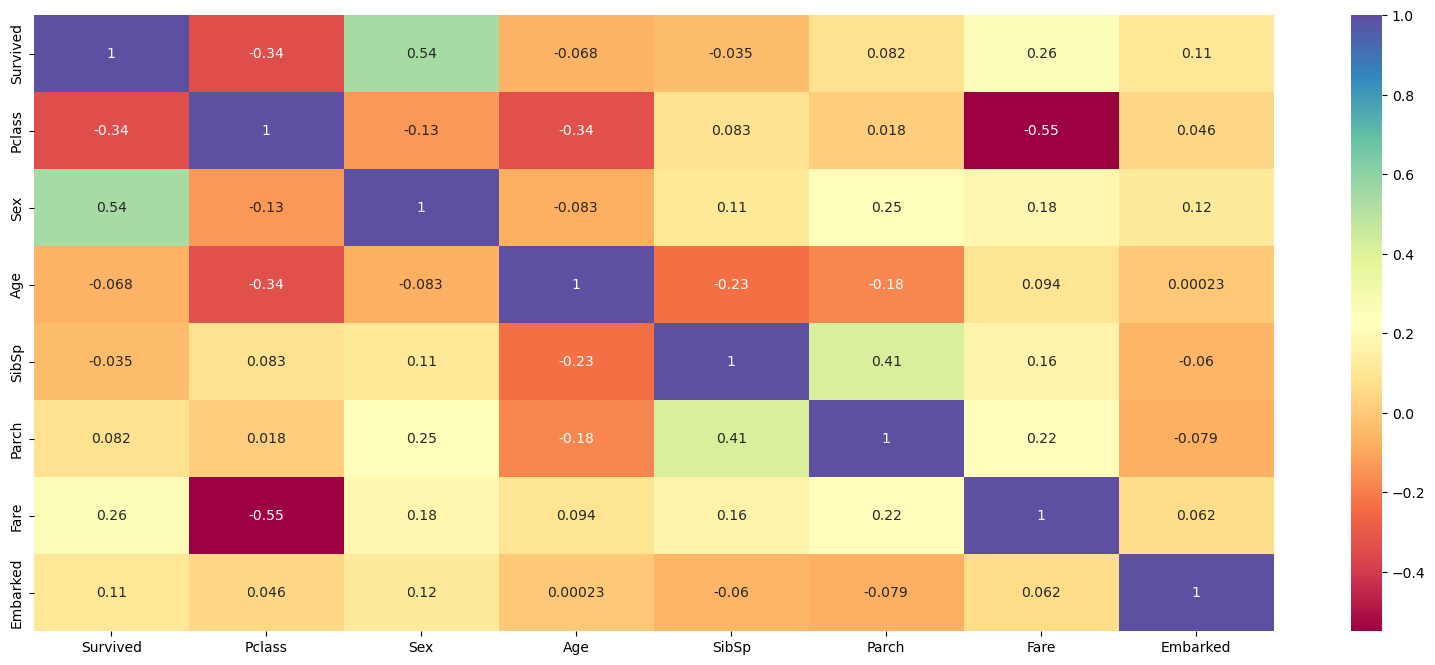

In [31]:
print("Final Features considered for Model Fitting: \n",df.columns )

print("Correlation matrix: \n")
print(df.corr())

print("*"*127)
fig = plt.figure(figsize = (20,8))
print("\n Heat Map: \n")
sns.heatmap(df.corr(),annot =True,cmap="Spectral")
plt.show()

**6: Final Step:**

Making data model for people survived or not.

In [25]:
X =df.drop('Survived',axis =1)
Y = df['Survived']
print(X)
print(Y)

     Pclass  Sex  Age  SibSp  Parch   Fare  Embarked
0         3    0   22      1      0   7.25         0
1         1    1   38      1      0  71.28         1
2         3    1   26      0      0   7.92         0
3         1    1   35      1      0  53.10         0
4         3    0   35      0      0   8.05         0
..      ...  ...  ...    ...    ...    ...       ...
886       2    0   27      0      0  13.00         0
887       1    1   19      0      0  30.00         0
888       3    1   29      1      2  23.45         0
889       1    0   26      0      0  30.00         1
890       3    0   32      0      0   7.75         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


*6.1 Spliting the data.*

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,  train_size=0.8,random_state = 0)

*6.2 Taking LogisticRegression Model and train it.*

In [27]:
model = LogisticRegression()

model.fit(X_train,Y_train)

LogisticRegression()

*6.3 Now, checking the accuracy of the Model*

In [28]:
X_train_prediction = model.predict(X_train)

print(X_train_prediction)

accuracy_X_train = accuracy_score(Y_train,X_train_prediction)

print("Accuracy score of training data: ", accuracy_X_train)

[1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 

*6.4 Final Step, testing the data to our model and checking the accuracy score*

In [29]:
Y_pred = model.predict(X_test)
print(Y_pred)

print("Accuracy of the Model: ", accuracy_score(Y_test,Y_pred))

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]
Accuracy of the Model:  0.8100558659217877


*Our model has 81% accuracy and So, it is a good model*

In [34]:
test_X = pd.read_csv('Test.csv')
test_X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
Y_pred1 = model.predict(test_X)

C:\Users\Partha\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cabin
- Name
- PassengerId
- Ticket
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Kelly, Mr. James'